# Strapdown integration accuracy of C implementation.

### Refence strapdown test vector.
tests\simple_strapdown_reference.csv is generated using ```reference_strapdown_integration.ipynb```

### C imlementation
Running the ``process_strapdown_integration.exe`` generates the tests\strapdown_computed_with_c.csv


This notebook reads in the file and computes the accuracy of the C implementation.

In [1]:
%load_ext autoreload
%autoreload 2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kinematics import synthetic_signals, algebra as kinalg

Read file 

In [2]:
fpath_c = r'../tests/simple_strapdown_reference_with_c.csv'
df_c = pd.read_csv(fpath_c)
df_c.columns = [ch.strip() for ch in df_c.columns]
df_c.head(10)

,t,q_ref_w,q_ref_x,q_ref_y,q_ref_z,q_ls_w,q_ls_x,q_ls_y,q_ls_z
0,0.0,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0
1,1.0,0.999962,0.008727,0.0,0.0,0.999962,0.008726,0.0,0.0
2,2.0,0.999848,0.017452,0.0,0.0,0.999848,0.017451,0.0,0.0
3,3.0,0.999657,0.026177,0.0,0.0,0.999657,0.026174,0.0,0.0
4,4.0,0.999391,0.034899,0.0,0.0,0.999391,0.034894,0.0,0.0
5,5.0,0.999048,0.043619,0.0,0.0,0.999048,0.043611,0.0,0.0
6,6.0,0.998630,0.052336,0.0,0.0,0.998630,0.052324,0.0,0.0
7,7.0,0.998135,0.061049,0.0,0.0,0.998135,0.061032,0.0,0.0
8,8.0,0.997564,0.069756,0.0,0.0,0.997564,0.069735,0.0,0.0


Text(1, 0, 'Time (s)')

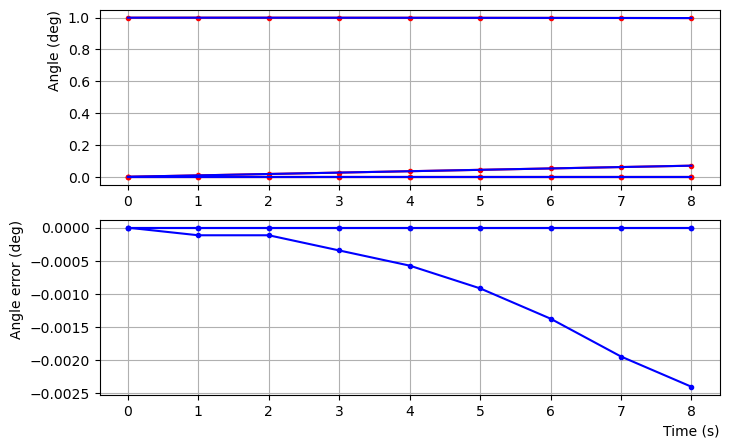

In [3]:
q_ref_array = df_c[[ch for ch in df_c.columns if ch.startswith('q_ref')]]
q_c_array = df_c[[ch for ch in df_c.columns if ch.startswith('q_ls')]]
h_ref = kinalg.array_quaternion_to_axisangle(q_ref_array.values)
h_c = kinalg.array_quaternion_to_axisangle(q_c_array.values)

_, axs = plt.subplots(2, 1, figsize=(8, 5))
axs[0].grid()
axs[0].set_ylabel('Angle (deg)', loc='top')	

# axs[0].plot(e_ref, color='red', marker='.')
# axs[0].plot(e_c, color='blue')
axs[0].plot(q_ref_array, color='red', marker='.')
axs[0].plot(q_c_array, color='blue')

axs[1].grid()
axs[1].plot((180/np.pi)*(h_c-h_ref), color='blue', marker='.')	
axs[1].set_ylabel('Angle error (deg)', loc='top')	
axs[1].set_xlabel('Time (s)', loc='right')	
